**This dataset is from kaggle: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?resource=download**

Data Collection and Exploration

In [ ]:
import pandas as pd

data = pd.read_csv("/content/creditcard.csv")
print("Dataset's First 5 Rows\n")
print(data.head())
print("Data Information\n")
print(data.info())
print("Data Descriptive Statistics\n")
print(data.describe())

Dataset's First 5 Rows

   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        

Data Cleaning and Preprocessing

In [ ]:
from sklearn.preprocessing import StandardScaler #to standardize features by removing the mean and scaling to unit variance.

data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))
data.drop(['Time', 'Amount'], axis=1, inplace=True)

In [ ]:
print(data.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Class  NormalizedAmount  

Exploratory Data Analysis (EDA)

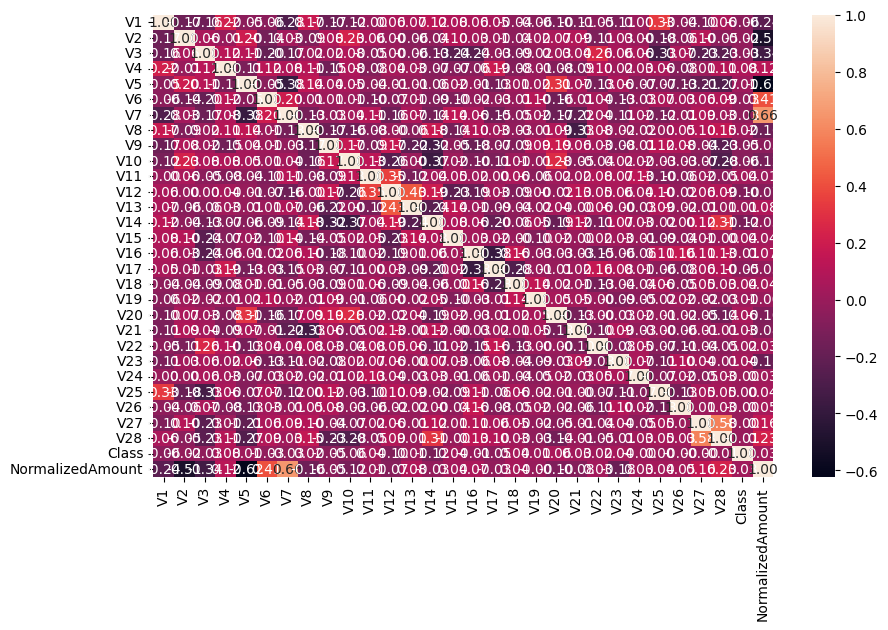

In [ ]:
#Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (10,6))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

Handling Class Imbalance

In [ ]:
# Check for missing values in the entire dataset
print(data.isnull().sum())

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 1
V15                 1
V16                 1
V17                 1
V18                 1
V19                 1
V20                 1
V21                 1
V22                 1
V23                 1
V24                 1
V25                 1
V26                 1
V27                 1
V28                 1
Class               1
NormalizedAmount    1
dtype: int64


In [ ]:
#Dropping null values
data = data.dropna()
print(data.isnull().sum())

V1                  0
V2                  0
V3                  0
V4                  0
V5                  0
V6                  0
V7                  0
V8                  0
V9                  0
V10                 0
V11                 0
V12                 0
V13                 0
V14                 0
V15                 0
V16                 0
V17                 0
V18                 0
V19                 0
V20                 0
V21                 0
V22                 0
V23                 0
V24                 0
V25                 0
V26                 0
V27                 0
V28                 0
Class               0
NormalizedAmount    0
dtype: int64


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('creditcard.csv')

# Drop all rows containing null values
data = data.dropna()

# Normalize the 'Amount' feature
data['NormalizedAmount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

# Drop original 'Amount' and 'Time' columns
data.drop(['Time', 'Amount'], axis=1, inplace=True)

# Separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

# Apply SMOTE with a smaller k_neighbors value
sm = SMOTE(random_state=42, k_neighbors=1)
X_res, y_res = sm.fit_resample(X, y)

# Check the shape of the resampled datasets
print(f"Original dataset shape: {X.shape, y.shape}")
print(f"Resampled dataset shape: {X_res.shape, y_res.shape}")

Original dataset shape: ((3972, 29), (3972,))
Resampled dataset shape: ((7940, 29), (7940,))


Model Development

In [ ]:
#Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42)

In [ ]:
#Training multiple models and compare their performance
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score

models = {
    'RandomForest' : RandomForestClassifier(n_estimators = 100, random_state=42),
    'LogisticRegression' : LogisticRegression(),
    'XGBoost' : XGBClassifier(use_label_encoder = False, eval_metric='logloss')
}

for name, model in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(f'{name} Classification Report: \n')
  print(classification_report(y_test, y_pred))
  print(f'{name} ROC-AUC: {roc_auc_score(y_test, y_pred)}\n')

RandomForest Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

RandomForest ROC-AUC: 1.0

LogisticRegression Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00      1176

    accuracy                           1.00      2382
   macro avg       1.00      1.00      1.00      2382
weighted avg       1.00      1.00      1.00      2382

LogisticRegression ROC-AUC: 0.997927031509121

XGBoost Classification Report: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1206
         1.0       1.00      1.00      1.00     

In [ ]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract TN, FP, FN, TP
TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print("True Negatives (TN):", TN)
print("False Positives (FP):", FP)
print("False Negatives (FN):", FN)
print("True Positives (TP):", TP)

True Negatives (TN): 1204
False Positives (FP): 2
False Negatives (FN): 0
True Positives (TP): 1176


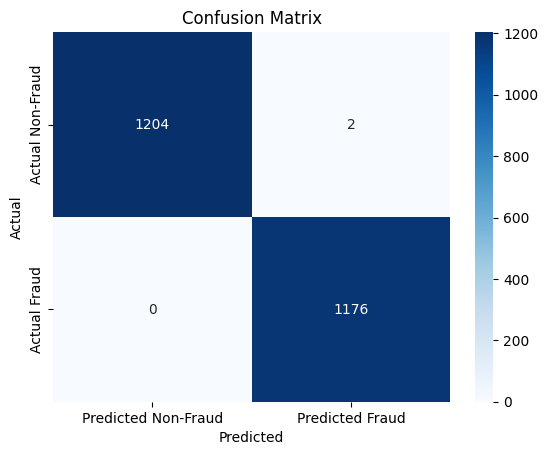

In [ ]:
#Visualizing confusion matrix
# Plot confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Non-Fraud', 'Predicted Fraud'],
            yticklabels=['Actual Non-Fraud', 'Actual Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
import numpy as np

cm = np.array(confusion_matrix(y_test, y_pred, labels=[1,0]))
confusion = pd.DataFrame(cm, index=['is Fraud', 'is Normal'],columns=['predicted fraud','predicted normal'])
confusion

,predicted fraud,predicted normal
is Fraud,1176,0
is Normal,2,1204


from matplotlib import pyplot as plt
confusion['predicted fraud'].plot(kind='hist', bins=20, title='predicted fraud')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
confusion['predicted normal'].plot(kind='hist', bins=20, title='predicted normal')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
confusion.plot(kind='scatter', x='predicted fraud', y='predicted normal', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['predicted normal']
  ys = series['predicted fraud']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = confusion.sort_values('predicted normal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predicted normal')
_ = plt.ylabel('predicted fraud')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['predicted normal']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'predicted normal'}, axis=1)
              .sort_values('predicted normal', ascending=True))
  xs = counted['predicted normal']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = confusion.sort_values('predicted normal', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('predicted normal')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
confusion['predicted fraud'].plot(kind='line', figsize=(8, 4), title='predicted fraud')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
confusion['predicted normal'].plot(kind='line', figsize=(8, 4), title='predicted normal')
plt.gca().spines[['top', 'right']].set_visible(False)

Model Interpretation

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 7.9 MB/s eta 0:00:00


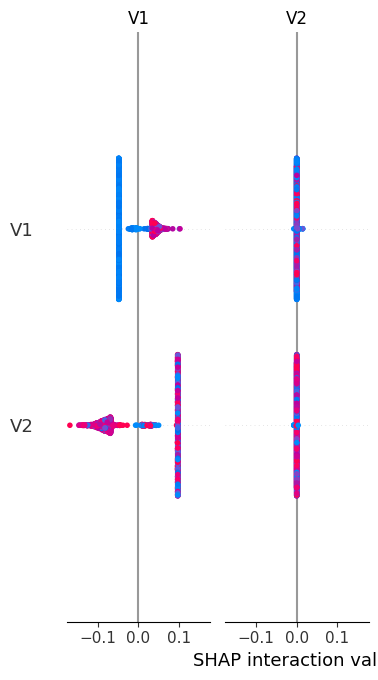

In [ ]:
!pip install shap
import shap

explainer = shap.TreeExplainer(models['RandomForest'])
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)